In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("netflixdata.csv")
df.tail(8000)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",NaN,"June 2, 2021",2017,TV-PG,212 min,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
808,s809,Movie,Sniper: Legacy,Don Michael Paul,"Tom Berenger, Chad Michael Collins, Doug Allen...","United States, Bulgaria","June 2, 2021",2014,R,98 min,Action & Adventure,When a troubled sniper begins killing officers...
809,s810,Movie,Starsky & Hutch,Todd Phillips,"Ben Stiller, Owen Wilson, Vince Vaughn, Juliet...",United States,"June 2, 2021",2004,PG-13,101 min,"Action & Adventure, Comedies",New undercover cop partners Starsky and Hutch ...
810,s811,Movie,Streets of Fire,Walter Hill,"Michael Paré, Diane Lane, Rick Moranis, Amy Ma...",United States,"June 2, 2021",1984,PG,94 min,"Action & Adventure, Classic Movies, Cult Movies",Tough ex-soldier Tom Cody springs into action ...
811,s812,Movie,Super Monsters: Once Upon a Rhyme,Steve Ball,"Elyse Maloway, Vincent Tong, Andrea Libman, Al...",NaN,"June 2, 2021",2021,TV-Y,25 min,Children & Family Movies,"From Goldilocks to Hansel and Gretel, the Supe..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [178]:
#see the shape of the dataset
df.shape # --> from this we see that our dataset have 8807 rows and 12 columns

(8807, 12)

In [179]:
df.info() # --> see the structure of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [180]:
df.dtypes # --> see the datatypes of each column from the dataset

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [181]:
# see if we have duplicates in dataset
df.duplicated().sum()

0

In [182]:
# see if we have null values in dataset
df.isna().sum() #on rating we have 4 rows with null values, and on duration 3

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [183]:
df[df['rating'].isna()] # see the rows that have null values in the rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [184]:
df[df['rating'].isna()] #--> after replacing the NaN values we run 
                        #this command again to see if we still have null values in the rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [185]:
df['director'] = df['director'].fillna('Unspecified')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration']= df['duration'].fillna(df['duration'].mode()[0])

In [186]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [187]:
#let's replace that "s" in the show_id
df['show_id'] = df['show_id'].str.replace('s','')

In [188]:
#keep the first name that appears on cast column
df['cast'] = df['cast'].str.split(',').str[0]
df.rename(columns = {"cast":"main_actor"}, inplace = True)
df.rename(columns={"listed_in":"genre"}, inplace = True)
df['genre'] = df['genre'].str.split(',').str[0]
df[df['show_id'].isin(['5542','5795','5814'])]

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,genre,description
5541,5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [189]:
#keep the first director before the comma
df[df['director'].str.contains(",",  case=False, na=False)]

filtered_rows = df[df['director'].str.contains(",", na=False)]

df.loc[filtered_rows.index, 'director'] = filtered_rows['director'].str.split(",", n=1).str[0]

In [190]:
#Data Cleaned Now we do the data analysis using the pandas library and represent the insights using matplotlib 

total_titles= df['show_id'].count()
print('Our dataset contains a total number of ' + total_titles.astype(str) + ' rows')

Our dataset contains a total number of 8807 rows


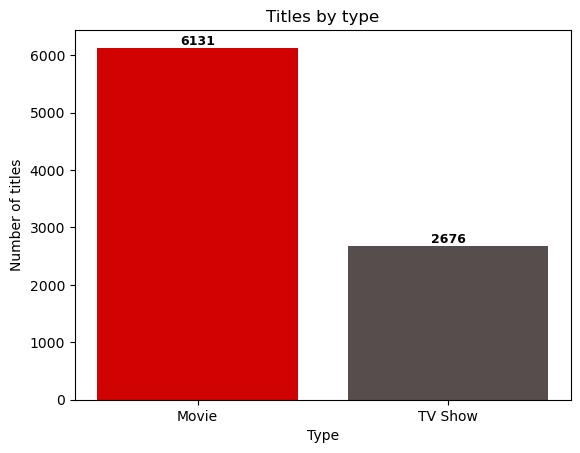

In [191]:
df_type = pd.DataFrame(df.groupby('type')['show_id'].count()).reset_index()
df_type.columns = ['Type','Number of titles']

vals = pd.Series(df_type['Number of titles'].values)

colors=['#D00202', '#564d4d']
plt.bar(df_type['Type'],height = df_type['Number of titles'], color = colors)
plt.xlabel('Type')
plt.ylabel('Number of titles')
plt.title('Titles by type')

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize= 9, fontweight='semibold')
    
plt.show()

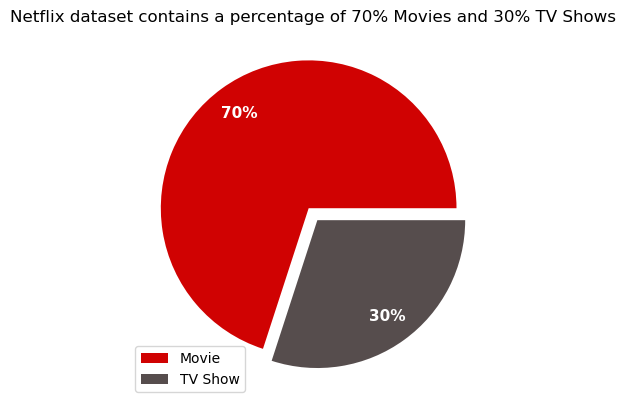

In [192]:
movies_percentage = ((df[df['type'] == 'Movie']['show_id'].count() / total_titles) * 100).round(0).astype(str)
tv_shows_percentage = ((df[df['type'] == 'TV Show']['show_id'].count() / total_titles) * 100).round(0).astype(str)

colors=['#D00202', '#564d4d']
slices = np.array([movies_percentage,tv_shows_percentage])
pie_labels=["Movie","TV Show"]
explode = (0.05, 0.05)
plt.pie(slices, labels=pie_labels , autopct='%1.0f%%', colors= colors, explode=explode, pctdistance=0.80, textprops={'color': 'white',  'weight': 'bold', 'fontsize': 11})

plt.legend(labels=pie_labels, loc='lower left')
plt.title('Netflix dataset contains a percentage of ' + '%d' %movies_percentage.astype(float) + '% Movies and ' + '%d' %tv_shows_percentage.astype(float) + '% TV Shows')
plt.show()

In [193]:
#5. Titles by genre (top 5)
df_movies_by_genre = pd.DataFrame(df.groupby('genre')['show_id'].count()).reset_index()
df_movies_by_genre.columns = ['genre','titles_number']
df_movies_by_genre = df_movies_by_genre.sort_values('titles_number',ascending=False).head(5)

df_movies_by_genre['color'] = df_movies_by_genre['titles_number'].apply(lambda x:'#564d4d' if x < 1000 else '#D00202')

df_movies_by_genre

,genre,titles_number,color
12,Dramas,1600,#D00202
7,Comedies,1210,#D00202
0,Action & Adventure,859,#564d4d
10,Documentaries,829,#564d4d
16,International TV Shows,774,#564d4d


In [194]:
df_titles_by_rating_and_type = pd.DataFrame(df.groupby(['rating','type'])['show_id'].count()) #duc la data cleaning--pt verificare
df_titles_by_rating_and_type

show_id
rating   type            
66 min   Movie          1
74 min   Movie          1
84 min   Movie          1
G        Movie         41
NC-17    Movie          3
NR       Movie         75
         TV Show        5
PG       Movie        287
PG-13    Movie        490
R        Movie        797
         TV Show        2
TV-14    Movie       1427
         TV Show      733
TV-G     Movie        126
         TV Show       94
TV-MA    Movie       2062
         TV Show     1145
TV-PG    Movie        540
         TV Show      323
TV-Y     Movie        131
         TV Show      176
TV-Y7    Movie        139
         TV Show      195
TV-Y7-FV Movie          5
         TV Show        1
UR       Movie          3

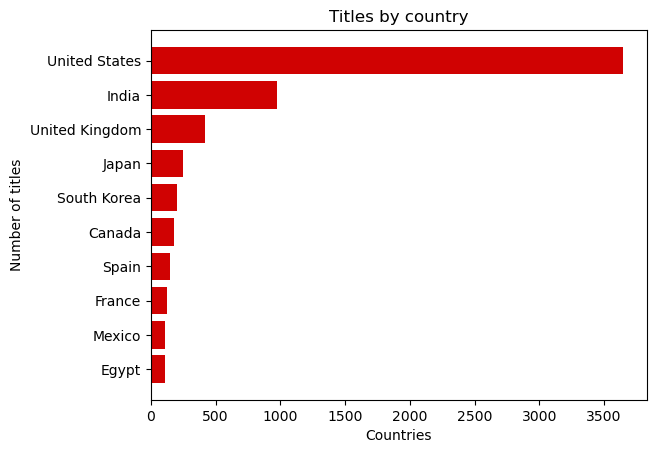

In [195]:
df_titles_by_country = df.groupby('country')['show_id'].count().reset_index()
df_titles_by_country.columns = ['country', 'title no']

df_titles_by_country['country'] = df_titles_by_country['country'].str.split(',').str[-1]
df_titles_by_country = df_titles_by_country.sort_values(by='title no', ascending= False).head(10)
top_10_countries_desc = df_titles_by_country.sort_values(by='title no', ascending=True)

plt.barh(top_10_countries_desc['country'], top_10_countries_desc['title no'], color='#D00202')
plt.xlabel('Countries')
plt.ylabel('Number of titles')
plt.title('Titles by country')

plt.show()

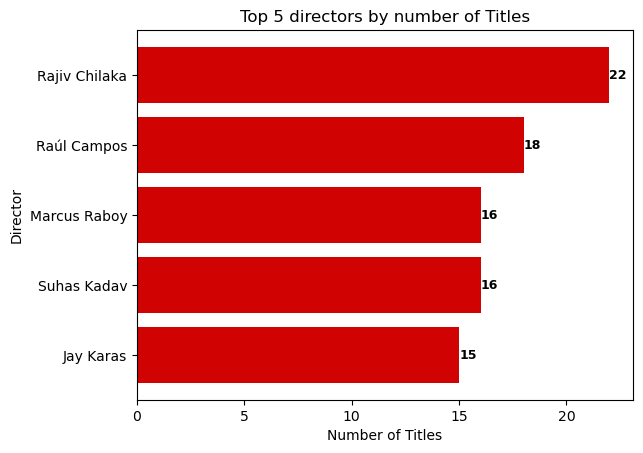

In [196]:
titles_per_director = df.groupby('director')['show_id'].count().astype(int).reset_index()
titles_per_director.columns = ['Director','Titles No']

director_titles = titles_per_director.sort_values(['Titles No','Director'], ascending=False).iloc[1:6]
director_titles = director_titles.sort_values('Titles No', ascending = True)
plt.barh(director_titles['Director'], director_titles['Titles No'], color = '#D00202')
plt.title('Top 5 directors by number of Titles')
plt.ylabel('Director')
plt.xlabel('Number of Titles')


for index,value in enumerate(director_titles['Titles No']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize= 9, fontweight='semibold')

plt.show()

In [227]:
# 1. Content Type Analysis
content_type_counts = netflix_df['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

NameError: name 'netflix_df' is not defined